In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # 图形类

np.random.seed(2022)


class Agent():
    terminal_state = np.arange(36, 48)  # 终止状态

    def __init__(self, board_rows, board_cols, actions_num, epsilon=0.2, gamma=0.9, alpha=0.1):
        self.board_rows = board_rows
        self.board_cols = board_cols
        self.states_num = board_rows * board_cols
        self.actions_num = actions_num
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        self.board = self.create_board()
        self.rewards = self.create_rewards()
        self.qtable = self.create_qtable()

    def create_board(self):  # 创建面板
        board = np.zeros((self.board_rows, self.board_cols))
        board[3][11] = 1
        board[3][1:11] = -1
        return board

    def create_rewards(self):  # 创建奖励表
        rewards = np.zeros((self.board_rows, self.board_cols))
        rewards[3][11] = 10
        rewards[3][1:11] = -100
        return rewards

    def create_qtable(self):  # 创建Q值
        qtable = np.zeros((self.states_num, self.actions_num))
        return qtable

    def change_axis_to_state(self, axis):  # 将坐标转化为状态
        return axis[0] * self.board_cols + axis[1]

    def change_state_to_axis(self, state):  # 将状态转化为坐标
        return state // self.board_cols, state % self.board_cols

    def choose_action(self, state):  # 选择动作并返回下一个状态
        if np.random.uniform(0, 1) <= self.epsilon:
            action = np.random.choice(self.actions_num)
        else:
            p = self.qtable[state, :]
            action = np.random.choice(np.where(p == p.max())[0])

        r, c = self.change_state_to_axis(state)
        new_r = r
        new_c = c

        flag = 0

        #状态未改变
        if action == 0:  # 上
            new_r = max(r - 1, 0)
            if new_r == r:
                flag = 1
        elif action == 1:  # 下
            new_r = min(r + 1, self.board_rows - 1)
            if new_r == r:
                flag = 1
        elif action == 2:  # 左
            new_c = max(c - 1, 0)
            if new_c == c:
                flag = 1
        elif action == 3:  # 右
            new_c = min(c + 1, self.board_cols - 1)
            if new_c == c:
                flag = 1

        r = new_r
        c = new_c
        if flag:
            reward = -1 + self.rewards[r,c]
        else:
            reward = self.rewards[r, c]

        next_state = self.change_axis_to_state((r, c))
        return action, next_state, reward


    def learn(self, s, r, a, s_,sarsa_or_q):
        # s状态，a动作，r即时奖励，s_演化的下一个动作
        q_old = self.qtable[s, a]
        # row,col = self.change_state_to_axis(s_)
        done = False
        if s_ in self.terminal_state:
            q_new = r
            done = True
        else:
            if sarsa_or_q == 0:
                if np.random.uniform(0.1) <= self.epsilon:
                    s_a = np.random.choice(self.actions_num)
                    q_new = r + self.gamma * self.qtable[s_, s_a]
                else:
                    q_new = r + self.gamma * max(self.qtable[s_, :])
            else:
                q_new = r + self.gamma * max(self.qtable[s_, :])
                # print(q_new)
        self.qtable[s, a] += self.alpha * (q_new - q_old)
        return done


    def initilize(self):
        start_pos = (3, 0)  # 从左下角出发
        self.cur_state = self.change_axis_to_state(start_pos)  # 当前状态
        return self.cur_state


    def show(self,sarsa_or_q):
        fig_size = (12, 8)
        fig, ax0 = plt.subplots(1, 1, figsize=fig_size)
        a_shift = [(0, 0.3), (0, -.4),(-.3, 0),(0.4, 0)]
        ax0.axis('off')  # 把横坐标关闭
        # 画网格线
        for i in range(self.board_cols + 1):  # 按列画线
            if i == 0 or i == self.board_cols:
                ax0.plot([i, i], [0, self.board_rows], color='black')
            else:
                ax0.plot([i, i], [0, self.board_rows], alpha=0.7,
                     color='grey', linestyle='dashed')

        for i in range(self.board_rows + 1):  # 按行画线
            if i == 0 or i == self.board_rows:
                ax0.plot([0, self.board_cols], [i, i], color='black')
            else:
                ax0.plot([0, self.board_cols], [i, i], alpha=0.7,
                         color='grey', linestyle='dashed')

        for i in range(self.board_rows):
            for j in range(self.board_cols):

                y = (self.board_rows - 1 - i)
                x = j

                if self.board[i, j] == -1:
                    rect = patches.Rectangle(
                        (x, y), 1, 1, edgecolor='none', facecolor='black', alpha=0.6)
                    ax0.add_patch(rect)
                elif self.board[i, j] == 1:
                    rect = patches.Rectangle(
                        (x, y), 1, 1, edgecolor='none', facecolor='red', alpha=0.6)
                    ax0.add_patch(rect)
                    ax0.text(x + 0.4, y + 0.5, "r = +10")

                else:
                    # qtable
                    s = self.change_axis_to_state((i, j))
                    qs = agent.qtable[s, :]
                    for a in range(len(qs)):
                        dx, dy = a_shift[a]
                        c = 'k'
                        q = qs[a]
                        if q > 0:
                            c = 'r'
                        elif q < 0:
                            c = 'g'
                        ax0.text(x + dx + 0.3, y + dy + 0.5,
                                 "{:.1f}".format(qs[a]), c=c)

        if sarsa_or_q == 0:
            ax0.set_title("Sarsa")
        else:
            ax0.set_title("Q-learning")
        if sarsa_or_q == 0:
            plt.savefig("Sarsa")
        else:
            plt.savefig("Q-Learning")
        plt.show(block=False)
        plt.pause(5)
        plt.close()


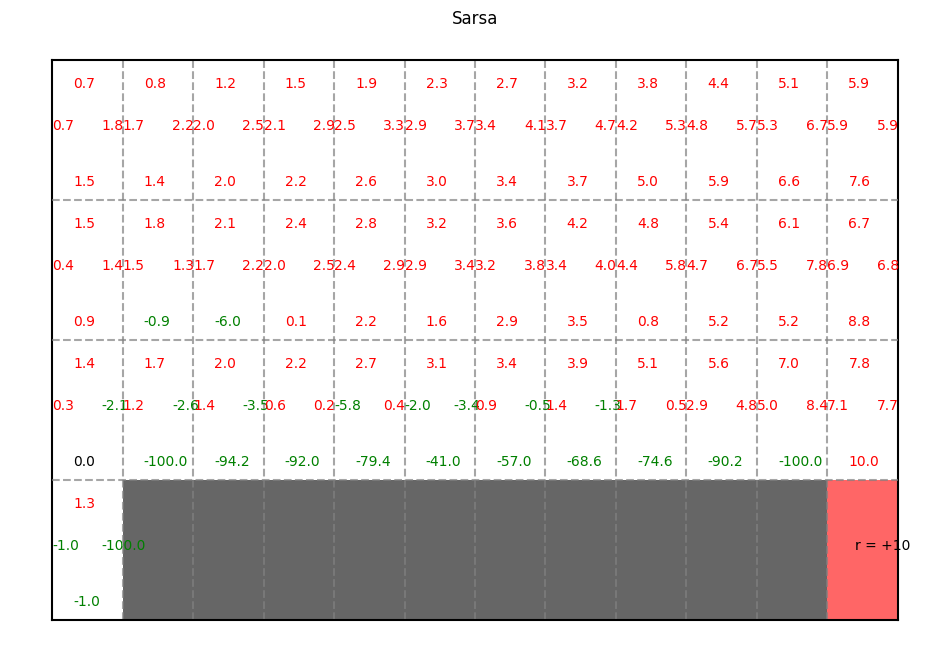

[[ 6.62600163e-01  1.49874615e+00  6.88192887e-01  1.80941809e+00]
 [ 8.44095576e-01  1.44093177e+00  1.65953497e+00  2.15637251e+00]
 [ 1.16193525e+00  1.96388704e+00  1.96917244e+00  2.52306390e+00]
 [ 1.48285690e+00  2.24503327e+00  2.14512227e+00  2.91524748e+00]
 [ 1.85893871e+00  2.58259853e+00  2.52597465e+00  3.31630754e+00]
 [ 2.31827387e+00  3.02439300e+00  2.93817025e+00  3.71658365e+00]
 [ 2.74024099e+00  3.35773869e+00  3.35161499e+00  4.10925679e+00]
 [ 3.16173304e+00  3.74524006e+00  3.65115434e+00  4.68359845e+00]
 [ 3.76556751e+00  5.03026740e+00  4.17705141e+00  5.28879614e+00]
 [ 4.38392125e+00  5.91488397e+00  4.78042579e+00  5.73825806e+00]
 [ 5.10957323e+00  6.61292215e+00  5.31539093e+00  6.66088308e+00]
 [ 5.92314049e+00  7.57426157e+00  5.88447290e+00  5.87899397e+00]
 [ 1.53941435e+00  9.26094922e-01  4.12612022e-01  1.42604397e+00]
 [ 1.81228757e+00 -9.44817992e-01  1.48114988e+00  1.26056158e+00]
 [ 2.12091661e+00 -5.99338400e+00  1.74836145e+00  2.24652903e

In [5]:
agent = Agent(4, 12, 4)
maxgen = 20000
gen = 1
sarsa_or_q = 0
while gen < maxgen:
    current_state = agent.initilize()
    while True:
        action, next_state, reward = agent.choose_action(current_state)
        done = agent.learn(current_state, reward, action, next_state,sarsa_or_q)
        current_state = next_state
        if done:
            break

    gen += 1

agent.show(sarsa_or_q)
print(agent.qtable)


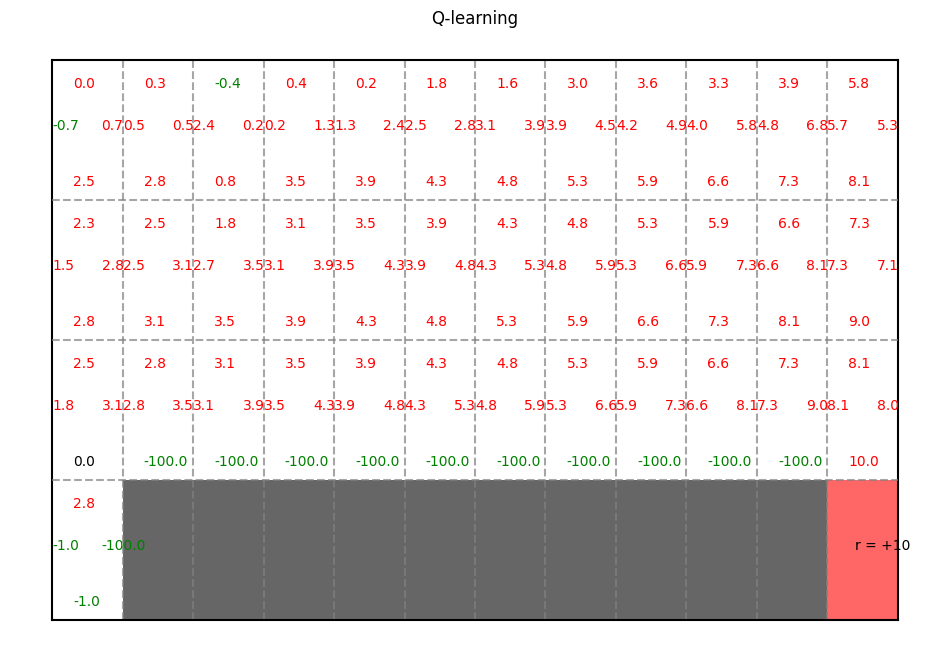

[[ 3.07900383e-02  2.53742581e+00 -6.86189404e-01  7.48907836e-01]
 [ 2.57558761e-01  2.82395234e+00  4.83299320e-01  5.42124074e-01]
 [-3.80717323e-01  8.02130785e-01  2.38581573e+00  1.92311115e-01]
 [ 4.19080659e-01  3.48221954e+00  2.01806546e-01  1.26572915e+00]
 [ 2.22557090e-01  3.87415263e+00  1.32293642e+00  2.37296796e+00]
 [ 1.80473606e+00  4.30467193e+00  2.50417649e+00  2.80372436e+00]
 [ 1.62975253e+00  4.78296900e+00  3.09908426e+00  3.87725221e+00]
 [ 3.03365439e+00  5.31441000e+00  3.87289907e+00  4.53861385e+00]
 [ 3.58851891e+00  5.90490000e+00  4.23056728e+00  4.90224980e+00]
 [ 3.29018735e+00  6.56100000e+00  3.95076822e+00  5.84140553e+00]
 [ 3.90513980e+00  7.29000000e+00  4.80837824e+00  6.79284724e+00]
 [ 5.76969819e+00  8.10000000e+00  5.65223690e+00  5.25427527e+00]
 [ 2.26086475e+00  2.82429536e+00  1.53905818e+00  2.81810621e+00]
 [ 2.53192285e+00  3.13810596e+00  2.53645682e+00  3.10955502e+00]
 [ 1.76377033e+00  3.47923929e+00  2.72027493e+00  3.48678440e

In [6]:
agent = Agent(4, 12, 4)
maxgen = 20000
gen = 1
sarsa_or_q = 1
while gen < maxgen:
    current_state = agent.initilize()
    while True:
        action, next_state, reward = agent.choose_action(current_state)
        done = agent.learn(current_state, reward, action, next_state,sarsa_or_q)
        current_state = next_state
        if done:
            break

    gen += 1

agent.show(sarsa_or_q)
print(agent.qtable)

## Полный текст

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # tqdm是显示循环进度条的库


class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  # 记录当前智能体位置的横坐标
        self.y = self.nrow - 1  # 记录当前智能体位置的纵坐标

    def step(self, action):  # 外部调用这个函数来改变当前位置
        # 4种动作, change[0]:上, change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  # 下一个位置在悬崖或者目标
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  # 回归初始状态,坐标轴原点在左上角
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x

# Sarsa

In [38]:
class Sarsa:
    """ Sarsa算法 """
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action=4):
        self.Q_table = np.zeros([nrow * ncol, n_action])  # 初始化Q(s,a)表格
        self.n_action = n_action  # 动作个数
        self.alpha = alpha  # 学习率
        self.gamma = gamma  # 折扣因子
        self.epsilon = epsilon  # epsilon-贪婪策略中的参数

    def take_action(self, state):  # 选取下一步的操作,具体实现为epsilon-贪婪
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action

    def best_action(self, state):  # 用于打印策略
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):  # 若两个动作的价值一样,都会记录下来
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a

    def update(self, s0, a0, r, s1, a1):
        td_error = r + self.gamma * self.Q_table[s1, a1] - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.alpha * td_error

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 1170.13it/s, episode=500, return=-18.900]


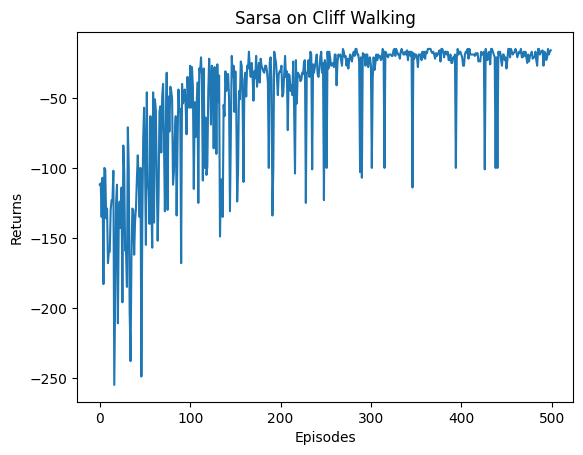

In [41]:
ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = Sarsa(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

return_list = []  # 记录每一条序列的回报
for i in range(10):  # 显示10个进度条
    # tqdm的进度条功能
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
            episode_return = 0
            state = env.reset()
            action = agent.take_action(state)
            done = False
            while not done:
                next_state, reward, done = env.step(action)
                next_action = agent.take_action(next_state)
                episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                agent.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Sarsa on {}'.format('Cliff Walking'))
plt.show()

In [40]:
def print_agent(agent, env, action_meaning, disaster=[], end=[]):
    for i in range(env.nrow):
        for j in range(env.ncol):
            if (i * env.ncol + j) in disaster:
                print('****', end=' ')
            elif (i * env.ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent.best_action(i * env.ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['^', 'v', '<', '>']
print('The final convergence of Sarsa algorithm yields a strategy of')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

The final convergence of Sarsa algorithm yields a strategy of
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo ooo> ^ooo ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ovoo 
^ooo ^ooo ^ooo ooo> ooo> ^ooo ^ooo oo<o ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


## pk2

Max return: -15
Std of return: 28.89919382958632


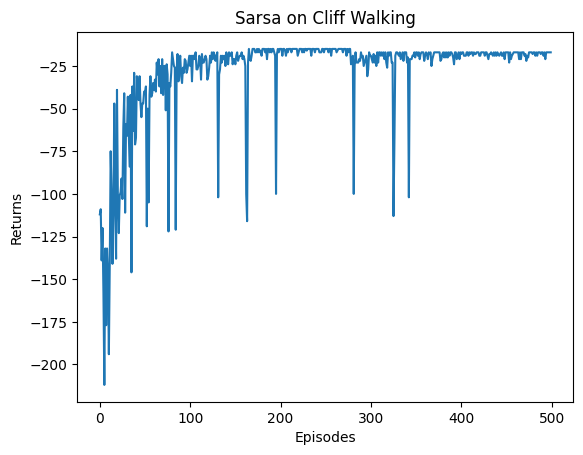

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  
# tqdm是显示循环进度条的库

class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  
        self.y = self.nrow - 1  

    def step(self, action):  
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x

ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(0)

epsilon = 0.05
alpha = 0.3
gamma = 0.9

agent = Sarsa(ncol, nrow, epsilon, alpha, gamma)

num_episodes = 500  # 智能体在环境中运行的序列的数量

return_list = []  

for i_episode in range(num_episodes):
    episode_return = 0
    state = env.reset()
    action = agent.take_action(state)
    done = False
    while not done:
        next_state, reward, done = env.step(action)
        next_action = agent.take_action(next_state)
        episode_return += reward  
        agent.update(state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
    return_list.append(episode_return)

# 计算总回报的最大值和标准差
max_return = np.max(return_list)
std_return = np.std(return_list)

print("Max return: {}".format(max_return))
print("Std of return: {}".format(std_return))

# 绘制回报随序列数变化的曲线
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Sarsa on {}'.format('Cliff Walking'))
plt.show()

# qlearning

In [6]:
class QLearning:
    """ Q-learning算法 """
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action=4):
        self.Q_table = np.zeros([nrow * ncol, n_action])  # 初始化Q(s,a)表格
        self.n_action = n_action  # 动作个数
        self.alpha = alpha  # 学习率
        self.gamma = gamma  # 折扣因子
        self.epsilon = epsilon  # epsilon-贪婪策略中的参数

    def take_action(self, state):  #选取下一步的操作
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action

    def best_action(self, state):  # 用于打印策略
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a

    def update(self, s0, a0, r, s1):
        td_error = r + self.gamma * self.Q_table[s1].max(
        ) - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.alpha * td_error

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 1054.87it/s, episode=500, return=-61.700]


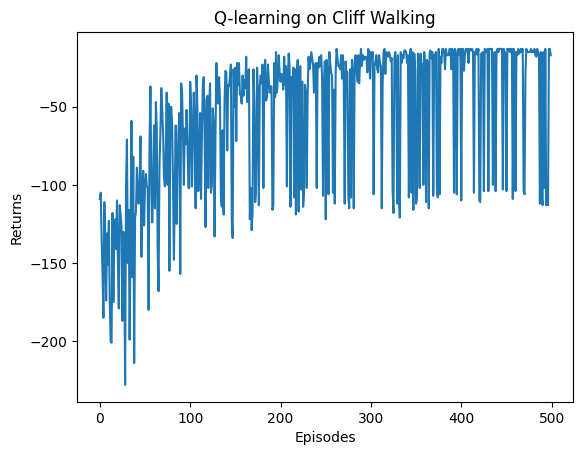

The final convergence of the Q-learning algorithm yields a strategy of
^ooo ovoo ovoo ^ooo ^ooo ovoo ooo> ^ooo ^ooo ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ooo> ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [7]:
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = QLearning(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

return_list = []  # 记录每一条序列的回报
for i in range(10):  # 显示10个进度条
    # tqdm的进度条功能
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = agent.take_action(state)
                next_state, reward, done = env.step(action)
                episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                agent.update(state, action, reward, next_state)
                state = next_state
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning on {}'.format('Cliff Walking'))
plt.show()

action_meaning = ['^', 'v', '<', '>']
print('The final convergence of the Q-learning algorithm yields a strategy of')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

# double q-learning

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 365.72it/s, episode=500, return=-65.800]


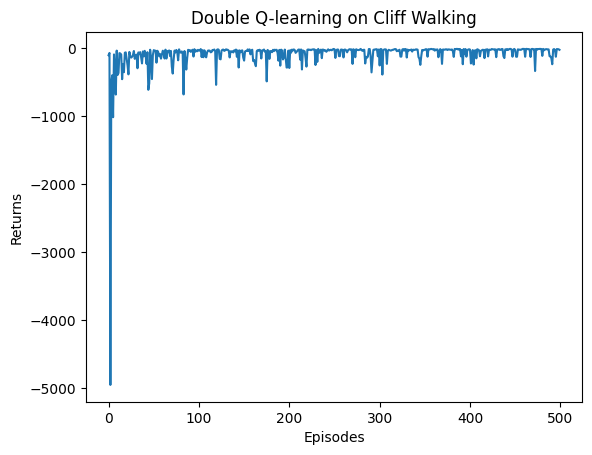

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class DoubleQLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q1 = np.zeros((env.observation_space.n, env.action_space.n))
        self.Q2 = np.zeros((env.observation_space.n, env.action_space.n))

    def take_action(self, state):
        if np.random.uniform() < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = self.best_action(state)
        return action

    def update(self, state, action, reward, next_state):
        if np.random.uniform() < 0.5:
            Q1, Q2 = self.Q1, self.Q2
        else:
            Q1, Q2 = self.Q2, self.Q1
        a_max = np.argmax(Q1[next_state])
        td_target = reward + self.gamma * Q2[next_state][a_max]
        td_error = td_target - Q1[state][action]
        Q1[state][action] += self.alpha * td_error

    def best_action(self, state):
        return np.argmax(self.Q1[state])

    def train(self, num_episodes=1000):
        return_list = []  # 记录每一条序列的回报
        for i in range(10):  # 显示10个进度条
            # tqdm的进度条功能
            with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
                for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
                    episode_return = 0
                    state = self.env.reset()
                    done = False
                    while not done:
                        action = self.take_action(state)
                        next_state, reward, done, info = self.env.step(action)
                        episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                        self.update(state, action, reward, next_state)
                        state = next_state
                    return_list.append(episode_return)
                    if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                        pbar.set_postfix({
                            'episode':
                            '%d' % (num_episodes / 10 * i + i_episode + 1),
                            'return':
                            '%.3f' % np.mean(return_list[-10:])
                        })
                    pbar.update(1)
        return return_list

    def test(self):
        state = self.env.reset()
        done = False
        steps = 0
        while not done:
            action = self.best_action(state)
            state, reward, done, info = self.env.step(action)
            steps += 1
        return steps

env = gym.make('CliffWalking-v0')
agent = DoubleQLearning(env)
return_list = agent.train(num_episodes=500)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Double Q-learning on {}'.format('Cliff Walking'))
plt.show()